In [3]:
!CXXFLAGS+=-stdlib=libc++ maturin develop --release
quit()

🔗 Found pyo3 bindings
🐍 Found CPython 3.11 at /Users/josh/josh/projects/tech/riversim/.venv/bin/python
💻 Using `MACOSX_DEPLOYMENT_TARGET=10.7` for x86_64-apple-darwin by default
   Compiling riversim v0.1.0 (/Users/josh/josh/projects/tech/riversim)
   --> src/physics.rs:368:5
    |
367 |       panic!("{:?}", pressure_opt_problem.compute_rhs(velocity));
    |       ---------------------------------------------------------- any code following this expression is unreachable
368 | /     let cg_solver: ConjugateGradient<_, Float> =
369 | |         ConjugateGradient::new(pressure_opt_problem.compute_rhs(velocity));
    | |___________________________________________________________________________^ unreachable statement
    |
    = note: `#[warn(unreachable_code)]` on by default

   --> src/physics.rs:317:31
    |
317 | ... fn compute_rhs(&self, velocity: &geom::VelocityField) -> geom::Pres...
    |                           ^^^^^^^^ help: if this is intentional, prefix it with an underscore:

In [1]:
import importlib

from joshpyutil import mpl
import tqdm

import riversim
riversim = importlib.reload(riversim)

num_cells = 100
solver = riversim.advection_1d(num_cells, 20)

courant_dt = 1 / num_cells / 0.03

with mpl.autovideo('advection_1d.mp4', 2, frame_rate_hz=20) as av:
    for step in tqdm.tqdm(range(50)):
        if step % 1 == 0:
            with av.next_frame() as ap:
                height = solver.height
                z_lattice = solver.z_lattice
                ap.plot(solver.grid.x_axis.centers, height[:, 0, 0], label='UL')
                ap.plot(solver.grid.x_axis.centers, height[:, 0, 1], '--', label='LR')
                ap.plot(solver.grid.x_axis.vertices, z_lattice[:, 0, -1], ':', label='Lattice')
                ap.set(ylim=[0, 2])
                ap.legend()

                ap = ap.next()
                pressure = solver.pressure
                p_all = []
                x_all = []
                z_all = []
                for i, x in enumerate(solver.grid.x_axis.vertices):
                    p_all.extend(pressure[i, 0])
                    x_all.extend([x] * len(pressure[i, 0]))
                    z_all.extend(z_lattice[i, 0])

                ap.scatter(x_all, z_all, c=p_all, s=40, alpha=0.5, linewidth=0)
                ap.set(ylim=[0, 2])
        solver.step(courant_dt / 2)

thread '<unnamed>' panicked at 'PressureField { vertices: [[[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 ...,

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]]], shape=[101, 2, 21], strides=[42, 21, 1], layout=Cc (0x5), const ndim=3 }', src/physics.rs:367:5
stack backtrace:
   0: _rust_begin_unwind
   1: core::panicking::panic_

PanicException: PressureField { vertices: [[[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 ...,

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]],

 [[-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0],
  [-9800.0, 0.0, 0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0, 0.0, 0.0]]], shape=[101, 2, 21], strides=[42, 21, 1], layout=Cc (0x5), const ndim=3 }

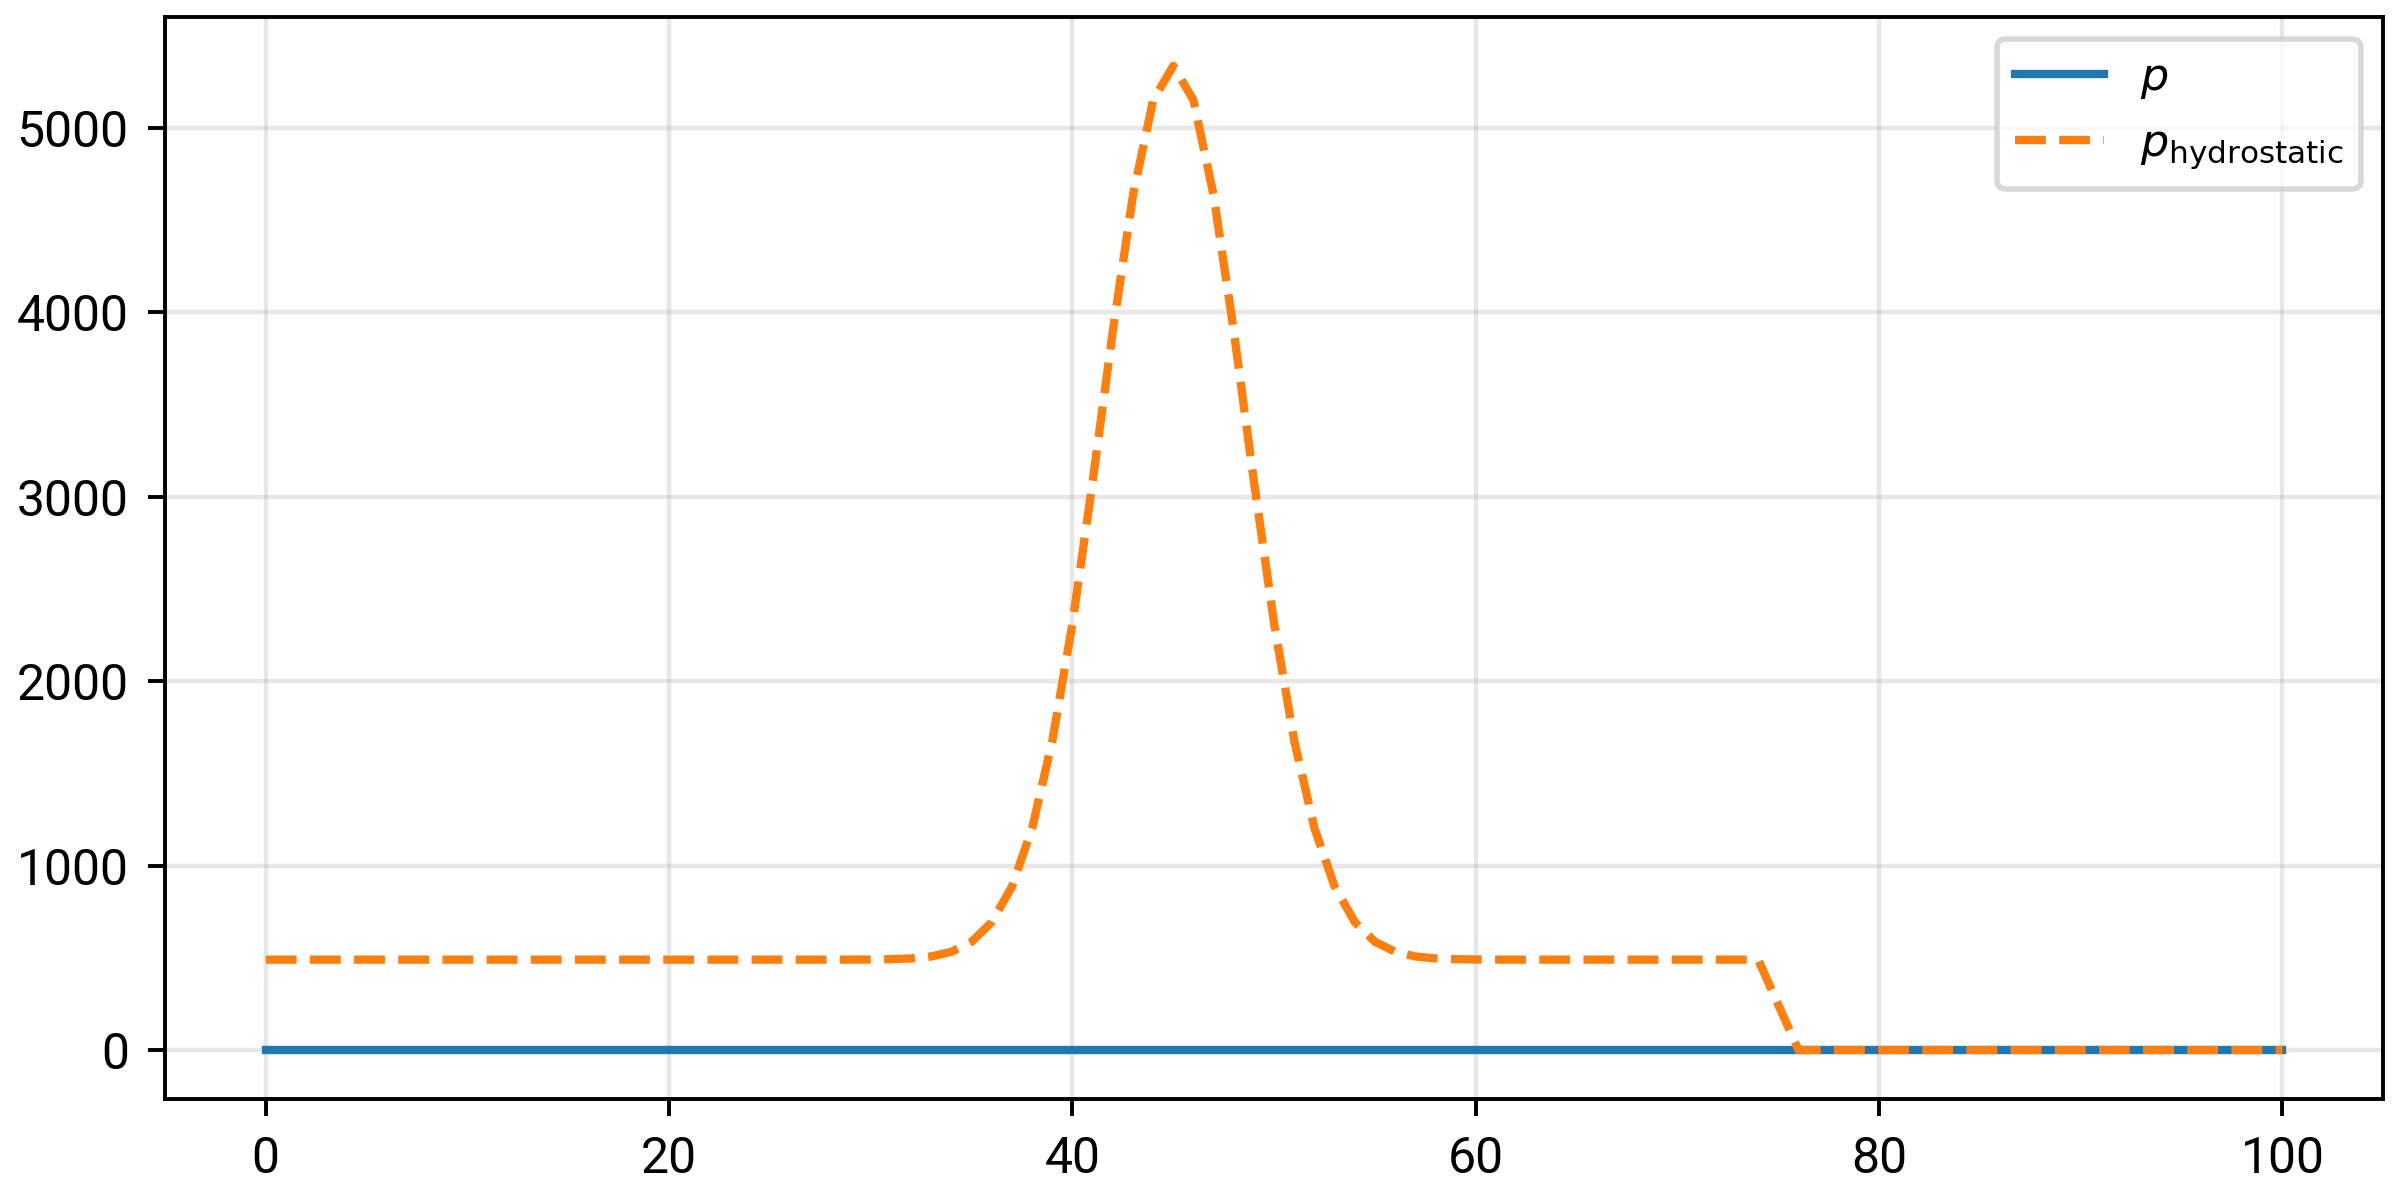

In [2]:
with mpl.autoplot() as ap:
    ap.plot(solver.pressure[:, 0, 10], label='$p$')
    ap.plot(solver.hydrostatic_pressure[:, 0, 10], '--', label='$p_\mathrm{hydrostatic}$')
    ap.legend()

In [3]:
solver.z_lattice[:, 0, -1]

array([0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.10000001, 0.10000003,
       0.10000015, 0.10000071, 0.10000304, 0.10001199, 0.10004375,
       0.10014748, 0.1004596 , 0.1013239 , 0.10352532, 0.10867817,
       0.11974987, 0.14155514, 0.18084022, 0.24540814, 0.34183734,
       0.47191579, 0.62888834, 0.79549035, 0.94573351, 1.05103561,
       1.08897237, 1.05103561, 0.94573351, 0.79549035, 0.62888834,
       0.47191579, 0.34183734, 0.24540814, 0.18084022, 0.14155514,
       0.11974987, 0.10867817, 0.10352532, 0.1013239 , 0.1004596 ,
       0.10014748, 0.10004375, 0.10001199, 0.10000304, 0.10000071,
       0.10000015, 0.10000003, 0.10000001, 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1    